<a href="https://colab.research.google.com/github/BHAVYA-3806/Fuel_Cell_Analysis/blob/main/102203806_Bhavya_MLeval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full.csv


In [3]:
#loading uploaded CSV file
data = pd.read_csv("Fuel_cell_performance_data-Full.csv")
print(data.head())

     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target1  Target2  Target3  Target4  Target5  
0  2.87  1362  15.9   429    0.959    1.531     79.3     4.19    33.29  
1  2.34  5130  26.1  1819    0.728    1.690     57.2     5.19    34.50  
2  2.13  7811  16.7  1763    0.784    1.865     61.6     7.77   129.28  
3  2.91  1641  32.1   203    0.884    1.920     71.3     8.40   186.65  
4  1.93  7648  27.5   276    0.736    1.711     58.5     4.75    52.32  


In [4]:
target_column = "Target2"
features = data.drop(columns = ["Target1", "Target3", "Target4", "Target5", target_column])
target = data[target_column]

In [5]:
# Drop rows with missing values
data = data.dropna()

In [6]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [8]:
#training model

# print(X_train.info())  # Check for non-numeric columns
# print(y_train.head())  # Check target column

# print(X_train.isnull().sum())  # Check for missing values in X_train
# print(y_train.isnull().sum())  # Check for missing values in y_train

# print(X_train.shape)  # Should be (n_samples, n_features)
# print(y_train.shape)  # Should be (n_samples,)

# print(y_train.unique())  # Check for continuous values
# print(y_train.dtype)     # Ensure it’s categorical

# Check the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (700, 15)
Testing Features Shape: (300, 15)
Training Target Shape: (700,)
Testing Target Shape: (300,)


In [9]:
#training and evaluatng the model using metrics like MSE and R² Score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
svr = SVR()
xgb_reg = XGBRegressor(random_state=42)

# Train and evaluate each model
models = {
    "Linear Regression": lin_reg,
    "Random Forest": rf_reg,
    "SVR": svr,
    "XGBoost": xgb_reg
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mse, "R2 Score": r2})

# Create a summary DataFrame
results_df = pd.DataFrame(results)
print(results_df)


               Model       MSE  R2 Score
0  Linear Regression  0.106163  0.635600
1      Random Forest  0.111609  0.616907
2                SVR  0.295571 -0.014537
3            XGBoost  0.121221  0.583912


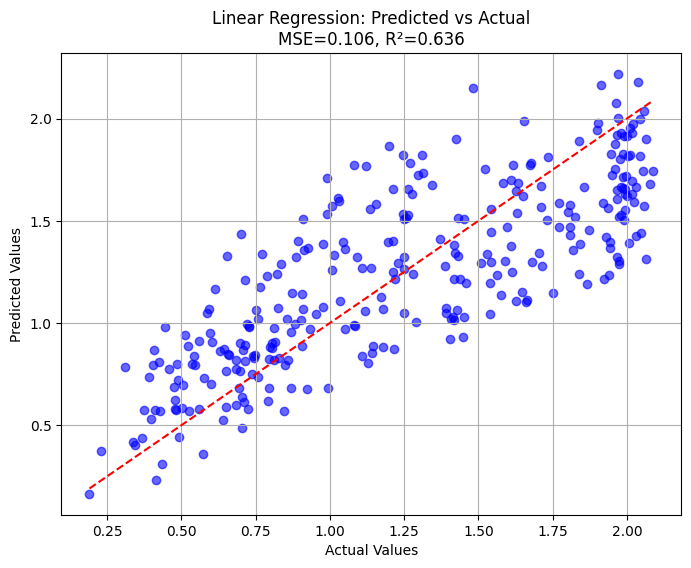

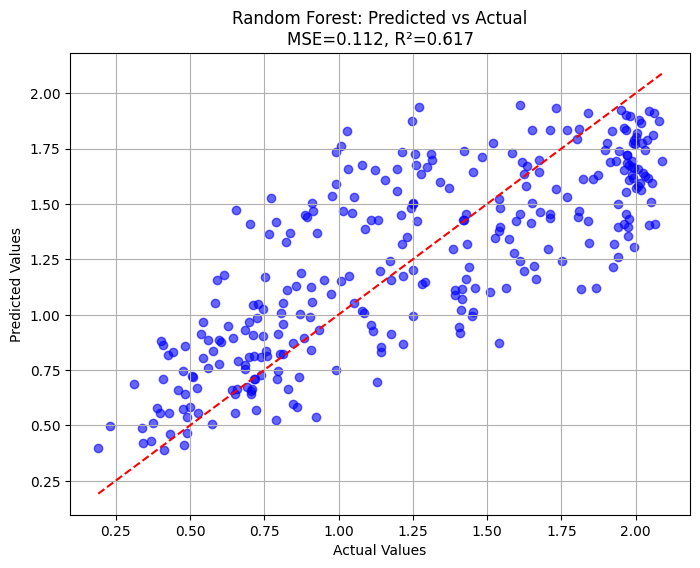

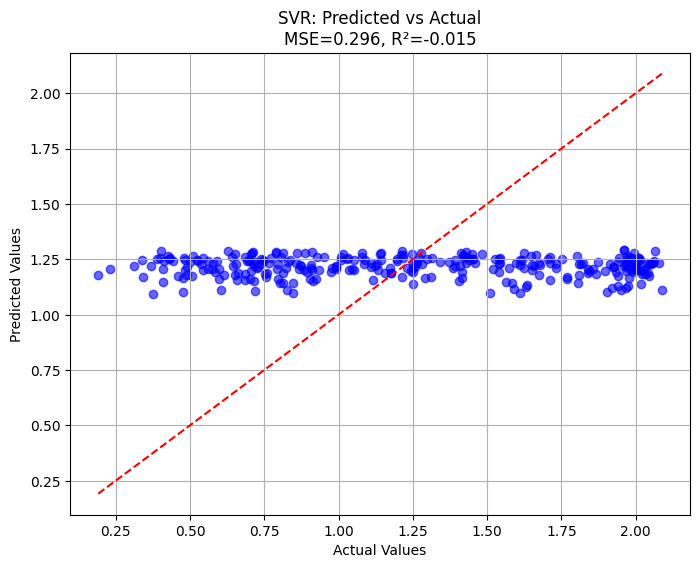

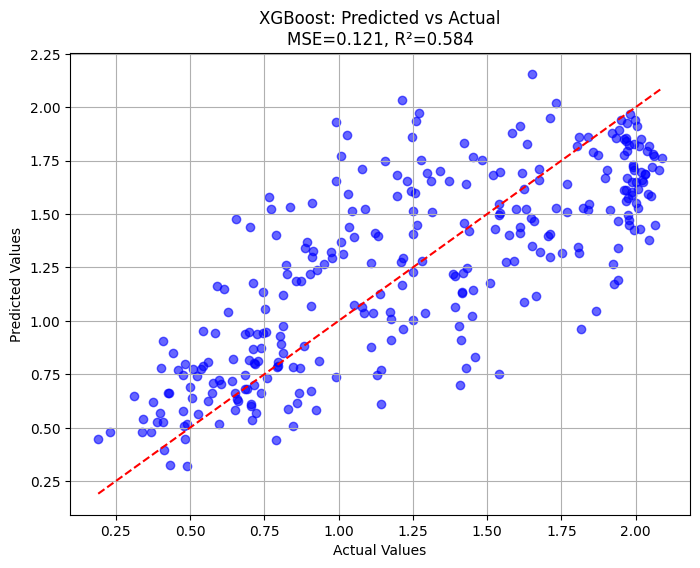

In [10]:
# Visualisation using graphs

# Create scatter plots for each model
for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"{name}: Predicted vs Actual\nMSE={mse:.3f}, R²={r2:.3f}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()



In [11]:
# Save the results_df to a CSV file
results_df.to_csv("102203806_BHAVYA_reg_res.csv", index=False)

In [12]:
# Download the file
from google.colab import files
files.download("102203806_BHAVYA_reg_res.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>